# Local Search

Implementation:
* [Base Classes](#Base-Classes)
* [Steepest Descent Search](#Steepest-Descent-Search)
* [Simulated Annealing](#Simulated-Annealing)

Demonstration:
* [8-Puzzle Formulation](#8-Puzzle-Formulation)
* [8-Puzzle Steepest Descent](#8-Puzzle-Steepest-Descent)
* [8-Puzzle Simulated Annealing](#8-Puzzle-Simulated-Annealing)

## Base Classes

Implements the Base Clases for Local Search.  These are modifications of our uninformed/formed search class and search node formulations.

In [1]:
import sys, math

class SearchClass:
    """
    Abstract implementation of local search algorithm and supporting methods
    """

    def __init__(self):
        """
        Initializes the Search class by creating the open list and closed list.
        """
        self.openL = list()
        self.closedL = set()
    
    
    def printPath(self, end):
        """
        Prints the solution path.  It builds a string, which 
        it finally prints once it has traversed from the tail of
        the solution path to its head.
        
        Note: a recursive solution could work, but exceeds the 
        Python recursive depth limit for problems with deep solution
        paths.
    
        @param end - last node in the solution path
        """
        strPath = ""
        cur = end
        while cur:
            strPath = "" + str(cur) + "\n" + strPath
            cur = cur.parent
        print(strPath)
        
        
    def search(self, initialS):
        """
        Abstract method to implement search
        @param initialS - initial state
        
        @return search node at solution state
        """
        pass    
    
        
class SearchNode:
    """
    Abstract implementation of a search node for uninformed search
    """
    def __init__(self, state, goal=None, parent=None):
        """
        Initializes the node with the current state and parent, if provided.
        @param state - problem state to be stored in node.
        
        @param parent - parent node (optional)
        """
        # Init class variables
        self.state = state
        self.goal = goal
        self.priority = 0
        self.setParent(parent)
        

    def setParent(self, parent):
        """
        Sets the parent to the SearchNode
        @param parent - parent of search node
        """
        self.parent = parent
        
        # New node's depth is parent's depth + 1
        if parent: 
            self.depth = parent.depth + 1
        else:
            self.depth = 1
        
            
    def getDepth(self):
        """
        @return depth of node
        """
        return depth
    
    def __eq__(self, other):
        """
        Abstract method to determine if two nodes are storing equal
        state values.
        @param other - other state node
        @return true if equivalent states; false otherwise
        """
        pass
    
    def __str__(self):
        """
        Abstract method to represent the state stored in the node as a string
        @return string representation of state
        """
        pass
    
    def __hash__(self):
        """
        Abstract method to return has value of node based on string representation of state.
        """
        pass
    
    def getSuccessors(self):
        """
        Abstract successor function
        @return list of successors for node
        """
        pass            
    
    def getHeuristic(self):
        """
        Abstract heuristic function
        @param goal - goal state
        @return heuristic distance to goal state
        """
        pass

## Steepest Descent Search

Implements a generic Steepest Descent class.  It is configured for a minimization problem. i.e. it will
attempt to minimize the heuristic score.

In [2]:
class SteepestDescentSearch(SearchClass):
    """
    Implements a steapest descent hill-climbing local search algorithm.
    
    The algorithm starts with an initial state. It expands its selectors and
    chooses the best successor.
    
    If the best successor is better (or a tie) to current, the successor becomes the current node
    and the search continues.  The search stops if the distance to the goal (i.e. estimated cost to goal
    is zero)
    @param initial - initial state
    @param iterations - number of iterations, n
    @return result, score - result is the final resulting node; score is a list of heuristic scores
    """
    def search(self, initial, iterations=sys.maxsize):
        
        #Initialize Search
        current = initial
        last = initial
        scores = []
        
        # Iterate n iterations
        for t in range(0,iterations):
            
            heuristic = current.getHeuristic()
            scores.append(heuristic)
            
            # Determines if distance to target state is 0.  If so, 
            # goal found
            if heuristic == 0:
                print("Solution found!")
                break
        
            # Sets up exploration of neighbors
            # * Sets current as the best neighbor
            # * Generates set of successors from parent
            # * Shuffles successors to allow random selection in the event of two best 
            #   states with the same heuristic value.
            best = current
            successors = current.getSuccessors()
            shuffle(successors)
            
            # Iterate thru successors
            for successor in successors:

                # Prevents oscillating back and forth between two states of
                # equal heuristic value.
                if successor == last:
                    continue
                
                # If the successor heuristic distance is better or equal to the best
                #  node's heuristic, assign it as the "best" node.
                if successor.getHeuristic() <= best.getHeuristic():
                    best = successor
                    break
            
            # If best == current, then minima reached.
            if best == current:
                print("Minima reach, algorithm ending.")
                break
            
            # Continue searching
            last = current
            current = best
            
        return current, scores

## Simulated Annealing

Implements a generic simulated annealing class.  It is configured for a minimization problem. i.e. it will
attempt to minimize the heuristic score.

In [3]:
from random import shuffle, random
import numpy as np
    
class SimulatedAnnealingSearch(SearchClass):   
    """
    Implements Simulated Annealing Search configured for descent (i.e.
    seeks to minimize heuristic)
    """
    
    def __init__(self, initial_probability, final_probability, iterations):
        """
        Initializes the SA class and configures the temperature schedule
        @param initial_probability - the initial probability of the SA schedule
        @param final_probability - the final probability of the SA schedule
        """
        super().__init__() #init parent
        
        # configure schedule
        self.T0 = -1/math.log(initial_probability)
        self.TN = -1/math.log(final_probability)
        self.Tstep = (self.TN/self.T0) ** (1/iterations)
        

    def probability(self, deltaE, temperature):
        """
        Implements a probability for the algorithm to choose a worse state than the current
        given the difference in energy (difference in estimated cost to goal) and the
        current temperature T.
        @param deltaE - energy difference between states
        @param temperature - current temperature
        @return probability of selecting worse state
        """
        return math.exp(-float(deltaE/temperature))
    
    
    def search(self, initial, iterations=sys.maxsize):
        """
        Implements the SA search algorithm
        """
        
        #Initial algorithm state
        current = initial
        scores = []
        T = self.T0
        
        #Iterate until minimum temperature reached
        while(T > self.TN):
            
            #Assess current state
            heuristic = current.getHeuristic()
            scores.append(heuristic)
            
            # End search if heuristic is zero, i.e. no estimated effort remaining; solution
            # found
            if heuristic == 0:
                print("Solution found.")
                break
            
            # Select  random successor
            successors = current.getSuccessors()
            shuffle(successors) #shuffle to ensure random 
            next = successors[0]
            
            # Calculate deltaE - difference in estimated cost of new state vs. current state
            deltaE = next.getHeuristic() - heuristic
            
            # If deltaE is zero, i.e. improved move, then set current state to next.
            if deltaE < 0:
                current = next
            # Otherwise, if a random number is less than the probability value for moving to a 
            #  worse state, then move to worse state
            elif np.random.uniform() < self.probability(deltaE, T):
                    current = next
            
            T = T * self.Tstep  # update temperature
            
        return current, scores

## 8-Puzzle Demonstration

### 8-Puzzle Formulation

Implements an 8-Puzzle formulation tailored for local search.  Exends the SearchNode class defined above for Local Search.

In [4]:
class eightPuzzleNode(SearchNode):
    """
    Implementation of the 8-Puzzle capable of supporting informed search algorithms   
    """
        
    def __eq__(self, other):
        """
        Compares two states to determine if equal
        @param other - other node to compare
        @return true if equal states, false otherwise
        """
        return self.state == other.state
    
    def __str__(self):
        """
        Prepares a string representation of the state
        """
        return (" ".join(map(str, self.state[0:3])) + "\n"  
            + " ".join(map(str, self.state[3:6])) + "\n" 
            + " ".join(map(str, self.state[6:9])) + "\n")
    
    def __hash__(self):
        """
        Returns has value based on string representation of state.
        """
        return hash(str(self))
    
    def getHeuristic(self):
        """
        Impelements a simple heuristic counting the number of incorrect values 
        in the 8-puzzle.
        """
        manhattanSum = 0;

        for i in range(9):
            pos1 = self.getCoord(i)
            pos2 = self.getCoord(self.goal.index(self.state[i]))
            # print(str(i) + " " + str(self.getDistance(pos1, pos2)))
            manhattanSum = manhattanSum + self.getDistance(pos1, pos2)
            
        return manhattanSum
    
    def getCoord(self,index):
        return index % 3, int(math.floor(index/3)) 
    
    def getDistance(self, pos1, pos2):
        return abs(pos1[0] - pos2[0]) + abs(pos1[1]-pos2[1])
        
    
    def getSuccessors(self):
        """
        Generates the set of successor nodes based upon where the blank can be 
        moved.  Up, down, left, or right.
        @return list of successor states
        """
        successorsL = []
        blank = self.state.index(0)
        
        if blank > 2:
            #swap up
            newState = self.state[:]
            newState[blank], newState[blank-3] = newState[blank-3], newState[blank]
            successorsL.append(eightPuzzleNode(newState, self.goal, self))
            pass
        
        if blank < 6:
            #swap down
            newState = self.state[:]
            newState[blank], newState[blank+3] = newState[blank+3], newState[blank]
            successorsL.append(eightPuzzleNode(newState, self.goal, self))
        
        if blank!=0 and blank!=3 and blank!=6:
            #swap left
            newState = self.state[:]
            newState[blank], newState[blank-1] = newState[blank-1], newState[blank]
            successorsL.append(eightPuzzleNode(newState, self.goal, self))
        
        if blank!=2 and blank!=5 and blank!=8:
            #swap right
            newState = self.state[:]
            newState[blank], newState[blank+1] = newState[blank+1], newState[blank]
            successorsL.append(eightPuzzleNode(newState, self.goal, self))

        return successorsL

### 8-Puzzle Steepest Ascent

This demonstration provides three sample 8-puzzle states with varying degree of maxima.  Execution of the algorithm is not guaranteed to yield a solution.  

Choose the initial state you wish to evaluate.  A plot will show the heuristic score of the current state as the algorithm progresses.  If it reaches zero, then it has reached the goal.  If it does not, then it became stuck in a minima during the search.

Solution found!


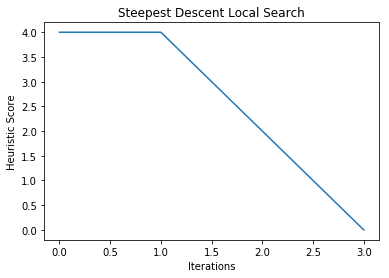

Result States
1 2 3
6 4 5
7 0 8

1 2 3
6 4 5
0 7 8

1 2 3
0 4 5
6 7 8

1 2 3
4 0 5
6 7 8




In [21]:
import matplotlib.pyplot as plt

initialS = eightPuzzleNode(state = [1, 2, 3, 6, 4, 5, 7, 0, 8], goal = [1, 2, 3, 4, 0, 5, 6, 7, 8]) #easy
#initialS = eightPuzzleNode(state = [0, 2, 3, 1, 4, 8, 6, 5, 7], goal = [1, 2, 3, 4, 0, 5, 6, 7, 8]) #med
#initialS = eightPuzzleNode(state = [1, 2, 3, 4, 5, 6, 7, 8, 0], goal = [1, 2, 3, 4, 0, 5, 6, 7, 8]) #hard

# Run search
search = SteepestDescentSearch()
result, scores = search.search(initialS,iterations = 200)

# Plot heuristic scores vs. iterations
plt.title("Steepest Descent Local Search")
plt.xlabel("Iterations")
plt.ylabel("Heuristic Score")
plt.plot(scores)
plt.show()

# Trace initial state to final state
print("Result States")
search.printPath(result)

### 8-Puzzle Simulated Annealing

This demonstration provides three sample 8-puzzle states with varying degree of maxima.  Execution of the algorithm is not guaranteed to yield a solution.  

Choose the initial state you wish to evaluate.  A plot will show the heuristic score of the current state as the algorithm progresses.  If it reaches zero, then it has reached the goal.  If it does not, then it became stuck in a minima during the search.

Solution found.


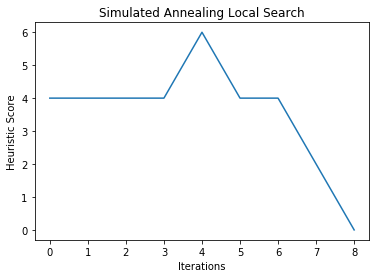

Result States
1 2 3
6 4 5
7 0 8

1 2 3
6 0 5
7 4 8

1 2 3
6 4 5
7 0 8

1 2 3
6 4 5
7 8 0

1 2 3
6 4 5
7 0 8

1 2 3
6 4 5
0 7 8

1 2 3
0 4 5
6 7 8

1 2 3
4 0 5
6 7 8




In [20]:
import matplotlib.pyplot as plt

initialS = eightPuzzleNode(state = [1, 2, 3, 6, 4, 5, 7, 0, 8], goal = [1, 2, 3, 4, 0, 5, 6, 7, 8]) #easy
#initialS = eightPuzzleNode(state = [0, 2, 3, 1, 4, 8, 6, 5, 7], goal = [1, 2, 3, 4, 0, 5, 6, 7, 8]) #med
#initialS = eightPuzzleNode(state = [1, 2, 3, 4, 5, 6, 7, 8, 0], goal = [1, 2, 3, 4, 0, 5, 6, 7, 8]) #hard

# Run search
search = SimulatedAnnealingSearch(0.7,0.001,10000)
result, scores = search.search(initialS)

# Plot heuristic scores vs. iterations 
plt.title("Simulated Annealing Local Search")
plt.xlabel("Iterations")
plt.ylabel("Heuristic Score")
plt.plot(scores)
plt.show()

# Trace initial state to final state
print("Result States")
search.printPath(result)
